In [1]:
import numpy as np
import pandas as pd

In [2]:
!gdown 1TdUywNbAevQvWef6zuDlJuqG-xL5cHJS

Downloading...
From: https://drive.google.com/uc?id=1TdUywNbAevQvWef6zuDlJuqG-xL5cHJS
To: /content/Cat62data_train.csv
100% 2.13k/2.13k [00:00<00:00, 16.5MB/s]


In [3]:
df = pd.read_csv('Cat62data_train.csv')

In [4]:
del df['Unnamed: 0']
df

,Month,y
0,2011-01,23341906
1,2011-02,22508980
2,2011-03,17134321
3,2011-04,11609845
4,2011-05,15947600
...,...,...
103,2019-08,19415353
104,2019-09,14866359
105,2019-10,11442528
106,2019-11,6780221


<Axes: >

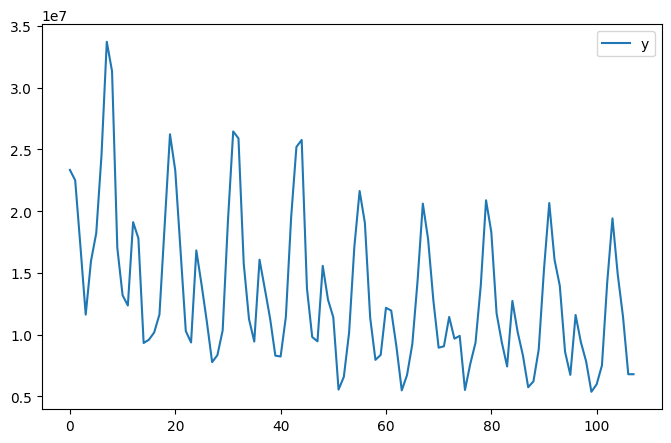

In [5]:
df.plot(figsize=(8,5))

In [6]:
import random

random_numbers = random.sample(range(108), 12)
random_numbers

[76, 85, 81, 55, 3, 17, 25, 93, 49, 23, 71, 18]

In [7]:
df_copy = df.copy()

In [8]:
for i in random_numbers:
  df_copy['y'].iloc[i] = np.nan

df_copy

<ipython-input-8-3c5acca44e25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['y'].iloc[i] = np.nan


,Month,y
0,2011-01,23341906.0
1,2011-02,22508980.0
2,2011-03,17134321.0
3,2011-04,NaN
4,2011-05,15947600.0
...,...,...
103,2019-08,19415353.0
104,2019-09,14866359.0
105,2019-10,11442528.0
106,2019-11,6780221.0


In [9]:
num_simulations = 100
def monte_carlo_imputation(data):
    imputed_data = data.copy()

    # Iterate over each column in the DataFrame
    for col in imputed_data.columns:
        # Get the indices of missing values in the column
        missing_indices = imputed_data[col].index[imputed_data[col].isnull()]

        # Iterate over each missing value index
        for index in missing_indices:
            # Perform Monte Carlo simulation
            simulations = np.random.choice(imputed_data[col].dropna(), size=num_simulations)
            imputed_data.loc[index, col] = np.mean(simulations)

    return imputed_data

imputed_df = monte_carlo_imputation(df_copy)

print(imputed_df)

       Month            y
0    2011-01  23341906.00
1    2011-02  22508980.00
2    2011-03  17134321.00
3    2011-04  14197380.31
4    2011-05  15947600.00
..       ...          ...
103  2019-08  19415353.00
104  2019-09  14866359.00
105  2019-10  11442528.00
106  2019-11   6780221.00
107  2019-12   6779529.00

[108 rows x 2 columns]


In [10]:
imputed_df

,Month,y
0,2011-01,23341906.00
1,2011-02,22508980.00
2,2011-03,17134321.00
3,2011-04,14197380.31
4,2011-05,15947600.00
...,...,...
103,2019-08,19415353.00
104,2019-09,14866359.00
105,2019-10,11442528.00
106,2019-11,6780221.00


<Axes: >

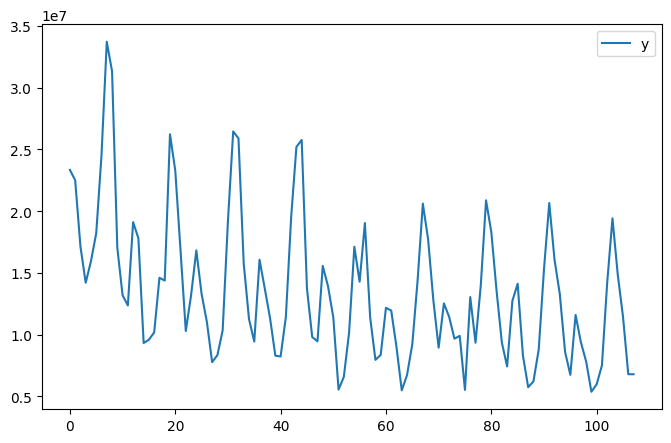

In [11]:
imputed_df.plot(figsize=(8,5))

In [12]:
sum = 0
for i in random_numbers:
  sum += ((df['y'].iloc[i] - imputed_df['y'].iloc[i])/df['y'].iloc[i])**2

sum /= 12
mspe = sum*100
mspe

10.813904258573283